# First Assignment: De Groote Nationale Investeer Bank

In [1]:
### Imports

import pandas as pd 
import numpy as np 
import sqlite3 
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [2]:
# Create your connection to the database
cnx = sqlite3.connect('transaction_data.db')

start = time.time()

# Read SQL data
query = "SELECT * FROM transaction_data"

# Make pandas DataFrame
df = pd.read_sql_query(query, cnx)
end = time.time()

# Copy dataframe in another df for future adjustments

df_mut = df

In [3]:
# Printing seconds needed

print("Reading and writing data to DataFrame took " + str(end-start) + " seconds")

Reading and writing data to DataFrame took 110.46354675292969 seconds


In [4]:
# Show first 5 lines from the dataset, print length df

print("Length of DataFrame is: " + str(len(df)))
df.head()

Length of DataFrame is: 7734834


,id,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,1,TRANSFER,0.01,C1231006815,170136.0,170135.990,C52983754,0.010,0.020
1,2,1,TRANSFER,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,9839.630
2,3,1,TRANSFER,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,1864.280
3,4,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,181.000
4,5,1,TRANSFER,181.000,C840083671,181.000,0.000,C38997010,21182.000,21363.000


# Examination of columns

In [5]:
# Change str types of columns to numeric types

df = df.astype({"id": int , "amount" : float, "oldbalanceOrig" : float, 
               "newbalanceOrig" : float, "oldbalanceDest" : float, "newbalanceDest" : float })

In [6]:
# Description of numeric columns

df.describe()

,id,timestamp,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06
mean,3.867418e+06,2.434319e+02,1.479531e+05,8.339802e+05,6.860270e+05,1.297193e+06,1.445146e+06
std,2.232854e+06,1.423561e+02,5.519739e+05,2.890095e+06,2.943681e+06,3.441619e+06,3.647220e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.621192e+07,-9.244552e+07,-4.366623e+06,-4.234680e+06
25%,1.933709e+06,1.560000e+02,3.954593e+03,0.000000e+00,-1.072120e+05,0.000000e+00,8.961312e+03
50%,3.867418e+06,2.390000e+02,3.424565e+04,1.416400e+04,-2.773930e+03,1.330728e+04,1.830557e+05
75%,5.801126e+06,3.350000e+02,1.744628e+05,1.073520e+05,6.296063e+04,1.277121e+06,1.514394e+06
max,7.734834e+06,7.430000e+02,9.244552e+07,7.743097e+07,7.742894e+07,3.572774e+08,3.574408e+08


### Distribution of 'amount' and balances from original bankholder

In [7]:
### Old and new balances of original bankaccount ###
# Collect the right values. Convert negative values.

amount_list_x = []

for i in df['oldbalanceOrig'].values:
# balance=0 is excluded to highlight other balances
#     if i == 0:
#         amount_list_x.append(i)
    if i > 0:
        amount_list_x.append(np.log(i))
    elif i < 0:
        value = -1* (np.log(i * -1))
        amount_list_x.append(value)
        
amount_list_y = []

for i in df['newbalanceOrig'].values:
    if i == 0:
        amount_list_y.append(i)
    if i > 0:
        amount_list_y.append(np.log(i))
    elif i < 0:
        value = -1* (np.log(i * -1))
        amount_list_y.append(value)

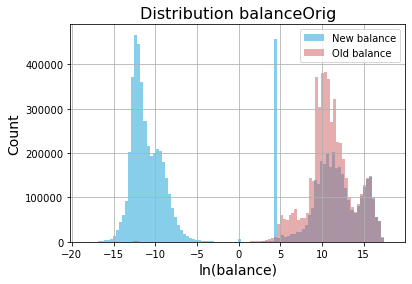

In [8]:
# Plot

plt.title('Distribution balanceOrig', fontsize=16)
plt.xlabel('ln(balance)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.hist(amount_list_y, bins = 100, color='skyblue')
plt.hist(amount_list_x, bins = 100, color='indianred', alpha=0.5)
plt.legend(['New balance', 'Old balance'])
plt.grid()
plt.savefig('amount-balOrig.png')
plt.show()

In [9]:
### Distribution of amount ###
# Collect the right values. Store amount = 0 as 0.

amount_list = []

for i in df['amount'].values:
    if i == 0:
        amount_list.append(i)
    else:
        amount_list.append(np.log(i))

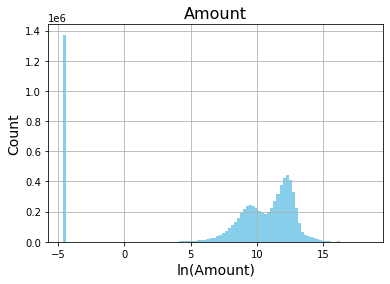

In [10]:
plt.title('Amount', fontsize=16)
plt.xlabel('ln(Amount)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.hist(amount_list, bins = 100, color='skyblue')
plt.grid()
plt.savefig('amount-distribution.png')
plt.show()

### Bank account frequencies ###

In [11]:
# Unique destination and original bank accounts (respectively)

udest = list(df["nameDest"].unique())
uorig = list(df["nameOrig"].unique())

print(len(udest), len(uorig))

2722364 6353308


In [12]:
# Calculate total distinct bank accounts

x = set(udest)
x.update(set(uorig))
print(len(x))

9073902


In [13]:
# Convert list to set and take intersection, convert back to list

udest_ = set(udest)
uorig_ = set(uorig)

same = udest_.intersection(uorig_)
same = list(same)

# Bank accounts that occur both as original and destination bank account

print(len(same))

1770


### Which accounts occur often?

In [14]:
# Destination accounts
### C52983754  occurs 1372194 times
# C1286084959  occurs 113 times

df['nameDest'].value_counts()

C52983754      1372194
C1286084959        113
C985934102         109
C665576141         105
C2083562754        102
                ...   
M1453975563          1
M733248339           1
M370445585           1
C1565221215          1
M2085390022          1
Name: nameDest, Length: 2722364, dtype: int64

In [15]:
# Original accounts
### C1286084959 occurs 20 times

df['nameOrig'].value_counts()

C1286084959    20
C883992034      4
C1038870419     4
C41773793       4
C460723608      4
               ..
C1882777706     1
C998995646      1
C1578170325     1
C111012330      1
C985024183      1
Name: nameOrig, Length: 6353308, dtype: int64

### 'Double' occurences

I.e. accounts that occur both as original and destination account

In [16]:
### Double Occurences ###
### Write all double occurences to csv ###
### Running takes about 30 min ###

# double = pd.DataFrame()

# counter = 0
# for i in same:
#     name = i
#     x = df_mut[df_mut['nameDest'] == name] 
#     y = df_mut[df_mut['nameOrig'] == name]
#     double = pd.concat([double, x])
#     double = pd.concat([double, y])
#     counter += 1
#     print(str(len(same)-counter) + " accounts to go.")
    
# double.to_csv('double.csv', index=False) 

In [17]:
# Read from csv

double = pd.read_csv('double.csv')

In [18]:
double.head()

,id,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,3727454,235,TRANSFER,107289.96,C1471030317,30766.0,-76523.960,C1824353376,39201.905,146491.865
1,6179859,355,TRANSFER,303185.64,C1748972860,10118.0,-293067.640,C1824353376,146491.865,449677.495
2,3323007,212,TRANSFER,178288.29,C1824353376,217490.2,39201.905,C234366354,712602.000,890890.285
3,1776353,140,TRANSFER,67405.70,C1469420006,448.0,-66957.705,C1205108866,0.000,67405.695
4,2755737,187,TRANSFER,188951.14,C1898747885,11761.0,-177190.140,C1205108866,67405.695,256356.835


In [19]:
# Length of constructed dataset

len(double)

15604

In [20]:
del double['type']

In [21]:
double = double.sort_values(by=['id'])

In [22]:
double.head()

,id,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
9196,123,1,583848.46,C1839168128,0.00,-583848.465,C1286084959,0.300,583848.755
9197,446,1,176334.26,C169880779,45136.00,-131198.260,C1286084959,583849.595,760183.845
9198,469,1,373068.26,C1047934137,20034.00,-353034.260,C1286084959,760183.935,1133252.195
9199,569,1,403418.39,C848097505,3834666.95,3431248.560,C1286084959,1133252.445,1536670.835
5721,680,1,100588.80,C1636588948,18913.68,-81675.125,C2050019814,105223.000,205811.795


Not very interesting, only things we already found are highlighted.

#### Investigate value counts of double 

In [23]:
double['nameOrig'].value_counts()

C1286084959    20
C1867564286     2
C379896225      2
C1230001999     2
C1694056031     2
               ..
C1384022458     1
C1603524835     1
C1395919612     1
C1624237728     1
C1753150528     1
Name: nameOrig, Length: 15190, dtype: int64

In [24]:
### the account C52983754 wins again with  392 times (one ct account)

double['nameDest'].value_counts()

C52983754      392
C1286084959    113
C874023329      58
C1552859894     58
C2050019814     52
              ... 
M1596584117      1
C1394291496      1
C1137200061      1
M1556077246      1
C515053096       1
Name: nameDest, Length: 3537, dtype: int64

In [25]:
double['timestamp'].value_counts()

307    140
18     136
139    136
235    131
187    125
      ... 
437      1
5        1
452      1
436      1
743      1
Name: timestamp, Length: 394, dtype: int64

##### Investigate C52983754 

In [26]:
df_mut[df_mut['nameDest'] == 'C1848904242']

,id,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
2708676,2708677,186,TRANSFER,511765.670,C749789952,781.000,-510984.670,C1848904242,47975.790,559741.460
3020429,3020430,204,TRANSFER,225682.100,C628174458,0.000,-225682.100,C1848904242,559741.460,785423.560
3097002,3097003,206,TRANSFER,68020.120,C1100645484,0.000,-68020.120,C1848904242,785423.560,853443.680
3341605,3341606,212,TRANSFER,31998.570,C1293982536,1546.000,-30452.570,C1848904242,853443.680,885442.240
4421709,4421710,275,TRANSFER,408749.820,C653296049,20753.000,-387996.820,C1848904242,885442.240,1294192.050
5147807,5147808,306,TRANSFER,10273.250,C1173172451,5031.000,-5242.255,C1848904242,1294192.050,1304465.295
5672578,5672579,330,TRANSFER,279064.760,C1430314799,0.000,-279064.760,C1848904242,1304465.295,1583530.055
6077763,6077764,353,TRANSFER,812900.110,C248851571,0.000,-812900.110,C1848904242,1583530.055,2396430.165
6191644,6191645,355,TRANSFER,119466.250,C1977451530,299716.000,180249.750,C1848904242,2396430.165,2515896.415
6343634,6343635,370,TRANSFER,193711.300,C1552859894,36366437.725,36172726.425,C1848904242,2515896.415,2709607.715


## Mutate original data frame 

In [27]:
# Specify the datatype of the columns

df_mut = df.astype({"amount" : float, "oldbalanceOrig" : float, 
               "newbalanceOrig" : float, "oldbalanceDest" : float, "newbalanceDest" : float })

In [28]:
# Multiply bij 1000, then round for proper roundings. Then convert to 64bit int.
# Long does NOT exists in python 3. An int is 64bit in Python 3.

df_mut["timestamp"] = df_mut["timestamp"].apply(lambda x: int(x))
df_mut["newbalanceOrig"] = df_mut["newbalanceOrig"].apply(lambda x: int(round(x*1000)))
df_mut["oldbalanceOrig"] = df_mut["oldbalanceOrig"].apply(lambda x: int(round(x*1000)))
df_mut["newbalanceDest"] = df_mut["newbalanceDest"].apply(lambda x: int(round(x*1000)))
df_mut["oldbalanceDest"] = df_mut["oldbalanceDest"].apply(lambda x: int(round(x*1000)))
df_mut["amount"] = df_mut["amount"].apply(lambda x: int(round(x*1000)))

In [29]:
# Delete type column and id column

del df_mut["type"]
del df_mut["id"]

### Calculate differences in balances

In [30]:
# Define the difference in balance of the account that transfers and the account that receives the money
# Add those differences to look for mistakes

df_mut['Orig_diff'] = df_mut['oldbalanceOrig']  - df_mut['newbalanceOrig']
df_mut['Dest_diff'] = df_mut['newbalanceDest'] - df_mut['oldbalanceDest']

In [31]:
# Highlight inconsistencies in balance

difference = []
    
for row in df_mut.values:
    difference.append(row[9]-row[8])

In [32]:
# Add new column with inconsistencies to dataframe 

df_mut['diff'] = difference

In [33]:
df_mut.head()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
0,1,10,C1231006815,170136000,170135990,C52983754,10,20,10,10,0
1,1,9839640,C1231006815,170136000,160296360,M1979787155,0,9839630,9839640,9839630,-10
2,1,1864280,C1666544295,21249000,19384720,M2044282225,0,1864280,1864280,1864280,0
3,1,181000,C1305486145,181000,0,C553264065,0,181000,181000,181000,0
4,1,181000,C840083671,181000,0,C38997010,21182000,21363000,181000,181000,0


### Investigate remarkable occurences

In [34]:
### Make subset of dataset with difference in balances

differences = df_mut[df_mut['diff'] != 0]

In [35]:
differences.head()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
1,1,9839640,C1231006815,170136000,160296360,M1979787155,0,9839630,9839640,9839630,-10
5,1,11668140,C2048537720,41554000,29885855,M1230701703,0,11668135,11668145,11668135,-10
7,1,7817710,C90045638,53860000,46042290,M573487274,0,7817700,7817710,7817700,-10
8,1,7107770,C154988899,183195000,176087225,M408069119,0,7107765,7107775,7107765,-10
9,1,7861640,C1912850431,176087230,168225585,M633326333,0,7861635,7861645,7861635,-10


In [36]:
### Only a difference of -10 occurs

differences['diff'].value_counts()

-10    3372180
Name: diff, dtype: int64

In [37]:
### all the 1 ct transactions result in 33721.80 euro

total_diff = (differences['diff'].sum())*-1
total_diff

33721800

Investigate when 1 cents are vanished mostly (at which timestamp)

In [38]:
diff_ts = differences[['timestamp', 'diff']]
diff_ts = diff_ts.groupby(['timestamp']).sum()
difts = list(diff_ts.index)
diff_val = list((diff_ts.values).flatten())

### Investigate the 'one cent' account

In [39]:
onecent = df_mut[df_mut['amount'] == 10]
onecent.head()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
0,1,10,C1231006815,170136000,170135990,C52983754,10,20,10,10,0
6,1,10,C90045638,53860000,53859990,C52983754,20,30,10,10,0
13,1,10,C249177573,20771000,20770990,C52983754,30,40,10,10,0
16,1,10,C1716932897,10127000,10126990,C52983754,40,50,10,10,0
20,1,10,C761750706,450000,449990,C52983754,50,60,10,10,0


In [40]:
### account C52983754  gets 1372194 times 1 ct

onecent['nameDest'].value_counts()

C52983754     1372194
C554562342          1
Name: nameDest, dtype: int64

In [41]:
onecent = onecent[onecent['nameDest'] == 'C52983754']

In [42]:
# total amount that C52983754 earned (Divide by thousand)

total = onecent['amount'].sum()
total

13721940

In [43]:
bet = total_diff - total
bet

19999860

#### Arrange C52983754 by timestamp

In [44]:
one = onecent[['timestamp', 'amount']]
one = one.groupby(['timestamp']).sum()

In [45]:
ts_one = list(one.index)
am_one = list((one.values).flatten())

In [46]:
# Make cumulative
am_one2 = []

sum_x = 0
for i in am_one:
    sum_x += i
    am_one2.append(sum_x)

am_one2[:10]

[5760, 7760, 9090, 10330, 11660, 15140, 30010, 74230, 154830, 230700]

### Investigate 'C1286084959' (occurs most as 'original' account)

In [47]:
# It occurs that ALL transactions from C1286084959 go to C2342523425

fraud_1ct = df_mut[df_mut['nameOrig'] == 'C1286084959']
fraud_1ct.head()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
226363,13,588800,C1286084959,28291069530,28290480730,C2342523425,0,588800,588800,588800,0
426361,17,517940,C1286084959,31078745265,31078227325,C2342523425,588800,1106740,517940,517940,0
541115,19,292980,C1286084959,31475729030,31475436050,C2342523425,1106740,1399720,292980,292980,0
786105,35,633550,C1286084959,32146482265,32145848715,C2342523425,1399720,2033270,633550,633550,0
944973,39,411960,C1286084959,33782267380,33781855420,C2342523425,2033270,2445230,411960,411960,0


In [48]:
## Total amount that is booked from C1286084959 to C2342523425 is 19999860

y = df_mut[df_mut['nameDest'] == 'C2342523425']['amount'].sum()
y

19999860

In [49]:
### This is EXACTLY the difference between the total difference and the one ct total amount!

# remember:
# total = onecent['amount'].sum()-10
# total_diff = (differences['diff'].sum())*-1

result = total_diff - total
result

19999860

Seems like C1286084959 books fraudulent money to C2342523425. It however needs to give up some money to C52983754 (the one ct account). It is still unclear where the difference in balance (the one cents differences) are stored. Therefore, we examine the account balance from C1286084959

#### C1286084959 Account balance

In [50]:
## fraud_1ct was the nameOrig dataframe of C1286084959

c4595 = df_mut[df_mut['nameDest'] == 'C1286084959']
print(len(c4595))
c4595.tail()

113


,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
5846720,346,84205390,C86576996,0,-84205390,C1286084959,76419822250,76504027640,84205390,84205390,0
5874532,347,235564750,C1068656420,0,-235564755,C1286084959,76504099380,76739664125,235564755,235564745,-10
6767230,393,119568310,C1878371174,8348248960,8228680650,C1286084959,76738820156,76858388466,119568310,119568310,0
6803238,394,381887530,C1789981744,50447000,-331440530,C1286084959,76858479596,77240367116,381887530,381887520,-10
7041037,401,189251840,C1256632176,22224000,-167027845,C1286084959,77239933486,77429185321,189251845,189251835,-10


In [51]:
### Merge properly to check account differences
### sort by index to get the right timeframe

c4595_ = pd.concat([c4595, fraud_1ct])
c4595_ = c4595_.sort_index()
print(len(c4595_))

133


In [52]:
### We see that the balances do NOT match... therefore we try to calculate the difference in acount balances.

c_ = c4595_
c_ = c_.reset_index()
del c_['index']

list1_ =[]
list2_ =[]
timestamps = []

for row in c4595_.values:
    if row[5] == 'C1286084959':
        list1_.append(row[6])
        list2_.append(row[7])
    elif row[2] == 'C1286084959':
        list1_.append(row[3])
        list2_.append(row[4])

dif = []

for i in range(len(list1_)):
    if i == len(list1_)-2:
        timestamps.append(c_.iloc[i, 0])
        x = list1_[i+1] - list2_[i]
        dif.append(x)
        break
    else:
        timestamps.append(c_.iloc[i, 0])
        x = list1_[i+1] - list2_[i]
        dif.append(x)

### Few visualizations about findings untill now

In [53]:
# MAKE df with dif and timestamps
## Prepare data for graphs

### The miraculously gained money
dif_ = pd.DataFrame()
dif_["ts"] = timestamps
dif_['Amount'] = dif
dif_ = dif_.groupby(['ts']).sum()

timestamp = list(dif_.index)
amounts = dif_.values
amounts = list(amounts.flatten())

## The onecents booked to C52983754
onecent = onecent[onecent["nameDest"] == 'C52983754']
onecent_ = onecent[['timestamp', 'amount']]
onecent_ = onecent_.groupby(['timestamp']).sum()

### all 1cts differences
## multiply by -1

val = [x*-1 for x in diff_val]

## Make the dissapeared 1cts cumulative

amounts2 = []
val2 = []

# amount miraculously created
sum__ = 0
for i in amounts:
    sum__ += i
    amounts2.append(sum__)

# for all 1cts vanished
sum_ = 0
for j in val:
    sum_ += j
    val2.append(sum_)

fraud_ts = list(fraud_1ct['timestamp'])
fraud_am = list(fraud_1ct['amount'])

# Make the transferred amounts from C1286084959 cumulative
## the bookings to another account

fraud_a = []

sumx = 0
for i in fraud_am:
    sumx += i
    fraud_a.append(sumx)
    
# Make cumulative
## All 1ct differences (C52983754)

am_one2 = []

sum_x = 0
for i in am_one:
    sum_x += i
    am_one2.append(sum_x)

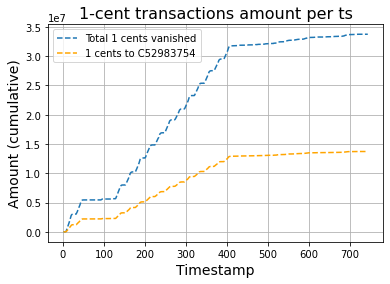

In [54]:
plt.title('1-cent transactions amount per ts', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Amount (cumulative)', fontsize=14)
plt.plot(difts, val2, linestyle='dashed')
plt.plot(ts_one, am_one2, linestyle='dashed', color='orange')
plt.legend(['Total 1 cents vanished', '1 cents to C52983754'])
plt.grid()
plt.savefig('ts_fraud-4.png')
plt.show()

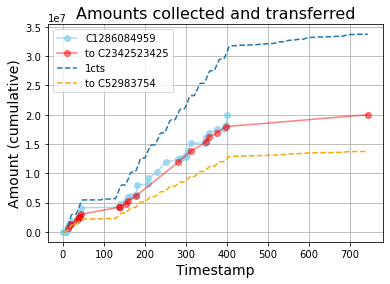

In [55]:
plt.title('Amounts collected and transferred', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Amount (cumulative)', fontsize=14)
plt.plot(timestamp, amounts2, marker='o', color='skyblue', alpha = 0.7)
plt.plot(fraud_ts, fraud_a, marker="o", color='red', alpha=0.5)
plt.plot(difts, val2, linestyle='dashed')
plt.plot(ts_one, am_one2, linestyle='dashed', color='orange')
plt.legend(['C1286084959', 'to C2342523425', '1cts', 'to C52983754'])
plt.grid()
# plt.savefig('ts_fraud-1.png')
plt.show()

Create line that approximates the values of 'C1286084959'

In [56]:
# product = val2 - am_one2

product = []

zip_object = zip(val2, am_one2)
for val2_i, am_one2_i in zip_object:
    product.append(val2_i-am_one2_i)

print(val2[:5], len(val2))
print(am_one2[:5], len(am_one2))
print(product[:5])

[14350, 19520, 22510, 25690, 28940] 741
[5760, 7760, 9090, 10330, 11660] 710
[8590, 11760, 13420, 15360, 17280]


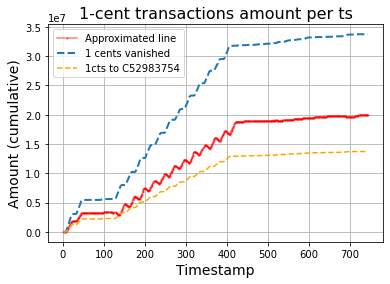

In [57]:
plt.title('1-cent transactions amount per ts', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Amount (cumulative)', fontsize=14)
plt.plot(ts_one, product, marker='o', markersize=1,  color='red', alpha = 0.5)
plt.plot(difts, val2, linestyle='dashed', linewidth=2)
plt.plot(ts_one, am_one2, linestyle='dashed', color='orange')
plt.legend(['Approximated line', '1 cents vanished', '1cts to C52983754'])
plt.grid()
plt.savefig('ts_fraud-3.png')
plt.show()

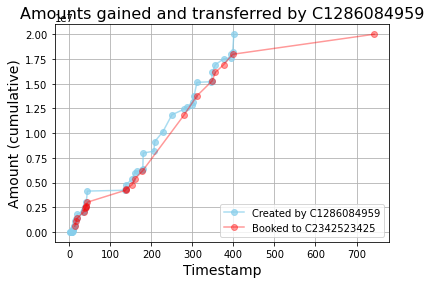

In [58]:
plt.title('Amounts gained and transferred by C1286084959', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Amount (cumulative)', fontsize=14)
plt.plot(timestamp, amounts2, marker='o', alpha = 0.7, color='skyblue')
plt.plot(fraud_ts, fraud_a, marker="o", alpha=0.4, color='red')
plt.legend(['Created by C1286084959', 'Booked to C2342523425'])
plt.grid()
plt.savefig('ts_fraud-2.png')
plt.show()

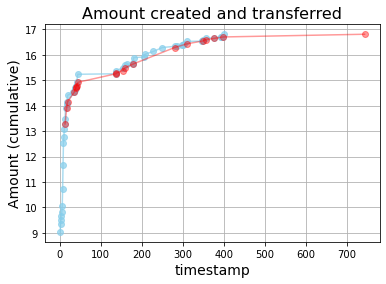

In [59]:
## Test whether it is more clear with LN

amounts3 = [np.log(x) for x in amounts2]
frauda2 = [np.log(x) for x in fraud_a]

plt.title('Amount created and transferred', fontsize=16)
plt.xlabel('timestamp', fontsize=14)
plt.ylabel('Amount (cumulative)', fontsize=14)
plt.plot(timestamp, amounts3, marker='o', alpha = 0.7, color='skyblue')
plt.plot(fraud_ts, frauda2, marker="o", alpha=0.4, color='red')
plt.grid()
plt.show()

In [60]:
## almost matches: y = df_mut[df_mut['nameDest'] == 'C2342523425']['amount'].sum()
## c4595_['diff'].sum() represent the difference (1 cts) that sometimes vanish even from C1286084959

sum_ = sum(dif)
sum_, y

(19999182, 19999860)

In [61]:
## Only 0.68 cents difference... (remember to divide by thousand)
# could easily be a rounding error or mistake in calculations.

a = (y - sum_)
a

678

In [62]:
# 1cts that vanish from C1286084959

c4595_['diff'].sum()/1000

-0.63

However, we can conclude that somehow the amounts that 'dissapear' (the 0cts), most likely are unvisibly added to the account of C1286084959 

### Patterns

In [63]:
# There is a pattern in the fraudulent transactions:
# First, the 0.01 cent is transferred to C52983754
# subsequently 0.01 cent is vanished from a recievers account

subset = onecent.head()

temporary = pd.DataFrame()
for name in subset['nameOrig']:
    x = df_mut[df_mut['nameOrig'] == name]
    temporary = pd.concat([temporary, x])

t2 = temporary
temporary

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
0,1,10,C1231006815,170136000,170135990,C52983754,10,20,10,10,0
1,1,9839640,C1231006815,170136000,160296360,M1979787155,0,9839630,9839640,9839630,-10
6,1,10,C90045638,53860000,53859990,C52983754,20,30,10,10,0
7,1,7817710,C90045638,53860000,46042290,M573487274,0,7817700,7817710,7817700,-10
13,1,10,C249177573,20771000,20770990,C52983754,30,40,10,10,0
14,1,3099970,C249177573,20771000,17671030,M2096539129,0,3099960,3099970,3099960,-10
16,1,10,C1716932897,10127000,10126990,C52983754,40,50,10,10,0
17,1,11633760,C1716932897,10127000,-1506760,M801569151,0,11633750,11633760,11633750,-10
20,1,10,C761750706,450000,449990,C52983754,50,60,10,10,0
21,1,1563820,C761750706,450000,-1113820,M1731217984,0,1563810,1563820,1563810,-10


In [64]:
# del t2['timestamp']
del t2['Orig_diff']
del t2['Dest_diff']
del t2['oldbalanceDest']

In [65]:
print(t2.to_latex(index=False))

\begin{tabular}{rrlrrlrr}
\toprule
 timestamp &    amount &     nameOrig &  oldbalanceOrig &  newbalanceOrig &     nameDest &  newbalanceDest &  diff \\
\midrule
         1 &        10 &  C1231006815 &       170136000 &       170135990 &    C52983754 &              20 &     0 \\
         1 &   9839640 &  C1231006815 &       170136000 &       160296360 &  M1979787155 &         9839630 &   -10 \\
         1 &        10 &    C90045638 &        53860000 &        53859990 &    C52983754 &              30 &     0 \\
         1 &   7817710 &    C90045638 &        53860000 &        46042290 &   M573487274 &         7817700 &   -10 \\
         1 &        10 &   C249177573 &        20771000 &        20770990 &    C52983754 &              40 &     0 \\
         1 &   3099970 &   C249177573 &        20771000 &        17671030 &  M2096539129 &         3099960 &   -10 \\
         1 &        10 &  C1716932897 &        10127000 &        10126990 &    C52983754 &              50 &     0 \\
         1 &

### Check on maximum amount transferred

In [69]:
df_mut[df_mut['amount'] == df_mut['amount'].max()]

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
4480645,276,92445516640,C1715283297,0,-92445516640,C439737079,125278520,92570795160,92445516640,92445516640,0


In [70]:
max_am = df_mut[df_mut["nameDest"] == 'C439737079']

C439737079 Does not occur in 'nameOrig'. Hence, it is plausible that it is a big company/bank (that people invest in). This actually holds for a lot of bank account numbers that occur more frequently as a destination account.

#### Look within one timestamp for 1 cents transactions to  C52983754 (not contributing to paper, rather used to explore!). You could skip.

In [71]:
t19 = onecent[onecent['timestamp'] == 19]

In [72]:
t19.head()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
535914,19,10,C1953554718,173954000,173953990,C52983754,947740,947750,10,10,0
535916,19,10,C1940254139,76299000,76298990,C52983754,947750,947760,10,10,0
535922,19,10,C1326479040,29547000,29546990,C52983754,947760,947770,10,10,0
535927,19,10,C1334585307,15811000,15810990,C52983754,947770,947780,10,10,0
535940,19,10,C442825830,12418000,12417990,C52983754,947780,947790,10,10,0


In [73]:
slice_ = pd.DataFrame()

In [74]:
# make slice of one cent dataframe where timestep is 19 in order to check for possible patterns.

count = 0
for i in t19.values:
    if count < 100:
        x = df_mut[df_mut['nameOrig'] == i[2]]
        slice_ = pd.concat([slice_, x])
        count += 1

In [75]:
len(slice_)

200

In [76]:
slice_['nameOrig'].value_counts()

C746483024     2
C1777569545    2
C1238570959    2
C1236225112    2
C617520666     2
              ..
C682819761     2
C334125749     2
C768306491     2
C393032316     2
C1333831427    2
Name: nameOrig, Length: 100, dtype: int64

In [78]:
slice_.tail()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
536477,19,112125740,C1229006543,195000,-111930740,C1837241711,480335580,592461310,112125740,112125730,-10
536478,19,10,C1487324447,0,-10,C52983754,948720,948730,10,10,0
536479,19,19685620,C1487324447,0,-19685620,C16762050,589131070,608816680,19685620,19685610,-10
536480,19,10,C1443517335,0,-10,C52983754,948730,948740,10,10,0
536481,19,2591400,C1443517335,0,-2591400,M941148717,0,2591390,2591400,2591390,-10


Create new DF and write to file, this however take hours so skipping is suitable

In [ ]:
# victims2 = pd.DataFrame()

In [ ]:
# begin = time.time()
# big_count = 0
# with open('p1.txt', 'a') as f:
#     for i in range(1,187):
#         slice_df_full = df_mut[df_mut['timestamp'] == i]
#         slice_df = onect[onect['timestamp'] == i]
#         length = len(slice_df)
#         count = 0
#         for origin in slice_df['nameOrig'].values:
#             big_count += 1
#             count += 1
#             rows = slice_df_full[slice_df_full['nameOrig'] == origin]
#             f.write(rows.to_string(header = False, index = False))
# #         victims2 = pd.concat([victims2, rows])
#             print("TS: " + str(i) + "; TO GO: " + str(length-count) + "; TIME: " + str(time.time()-begin) + "; TOT: " + str(big_count))

In [ ]:
# z = victims2['nameDest'].value_counts()

In [ ]:
# z

#### Investigate all balances that are under zero. This was before we realised it is quite normal to be in debt as an investor. 

In [79]:
zero_balance = df_mut[df_mut["oldbalanceOrig"] <= 0]

In [80]:
zero_balance.tail()

,timestamp,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Orig_diff,Dest_diff,diff
7733127,717,82899050,C1170262181,-279010325,-361909380,C1991152940,1485888165,1568787210,82899055,82899045,-10
7734636,730,0,C729003789,0,-5,C1388096959,1868150705,1868150700,5,-5,-10
7734638,730,10,C2088151490,0,-10,C52983754,13721570,13721580,10,10,0
7734639,730,0,C2088151490,0,0,C1156763710,0,-10,0,-10,-10
7734790,741,0,C312737633,0,0,C1400061387,267522865,267522865,0,0,0


In [83]:
zero_balance['newbalanceOrig'].min()

-92445516640

In [109]:
vals = zero_balance['nameDest'].value_counts()

In [85]:
### Accounts that often get money from accounts that are in debt
## Same prominent accounts occur als usual

vals

C52983754      454422
C2083562754        53
C665576141         51
C248609774         51
C1590550415        50
                ...  
M1026080412         1
M896664001          1
M1180170223         1
M1246595762         1
M1776784009         1
Name: nameDest, Length: 1099758, dtype: int64

In [86]:
val_list = []

counter = 0
for val in vals.index:
    if vals[counter] != 1:
        val_list.append([val, vals[counter]])
        counter += 1

In [87]:
len(val_list)

226387

#### Inconsistencies further examined

In [91]:
maximum = df_mut["timestamp"].max()
fraud_counts = dict()

for i in range(1, maximum + 1):
    count = 0
    x = df_mut[df_mut["timestamp"] == i].values
    for j in x:
        if j[10] != 0:
            count += 1
            
    y = len(x)
    fraud_counts[i] = [count, y]

In [108]:
## fraud_counts
## Used below

### Transactions per timestamp calculated

In [93]:
ts = []
amount = []

for i in range(1,744):
    ts.append(i)
    amount.append(fraud_counts[i][1])

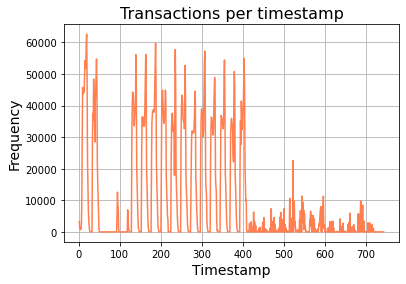

In [94]:
fig, ax = plt.subplots()
ax.plot(ts, amount,  color='coral')

ax.set_title('Transactions per timestamp', fontsize=16)
ax.set_xlabel('Timestamp', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.grid()
plt.savefig("transactions-ts.png")
plt.show()

### Irregular transactions per 24 timestamps

In [99]:
ts_day = []
amount_day = []

start = 0
count = 0
for i in range(1,744):
    if i % 24 == 0:
        count += 1
        start += fraud_counts[i][0]
        ts_day.append(count)
        amount_day.append(start)
        start = 0
    elif i == 743:
        count += 1
        start += fraud_counts[i][0]
        ts_day.append(count)
        amount_day.append(start)
        print("done")
    else:
        start += fraud_counts[i][1]

done


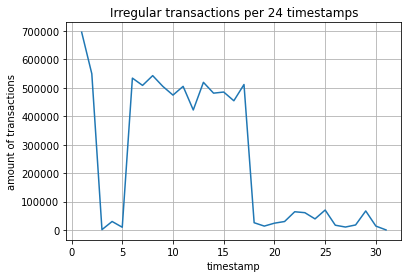

In [100]:
fig, ax = plt.subplots()
ax.plot(ts_day, amount_day)

ax.set(xlabel='timestamp', ylabel='amount of transactions',
       title='Irregular transactions per 24 timestamps')

ax.grid()
plt.show()

### Percentage of irregular transactions per 24 timestamps and per timestamp

In [101]:
fraud2_c = {k: [v[0]/v[1], v[1]] for k, v in fraud_counts.items()}

In [103]:
x_axis = []
y_axis = []

for i in range(1,744):
    x_axis.append(i)
    y_axis.append(fraud2_c[i][0])

In [104]:
ts_day = []
amount_day = []

start = 0
count = 0
for i in range(1,744):
    if i % 24 == 0:
        count += 1
        start += fraud2_c[i][0]
        ts_day.append(count)
        amount_day.append(start/24)
        start = 0
    elif i == 743:
        count += 1
        start += fraud2_c[i][0]
        ts_day.append(count)
        amount_day.append(start/23)
        print("done")
    else:
        start += fraud2_c[i][0]

done


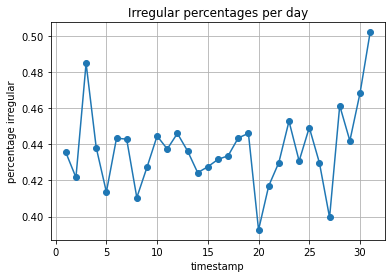

In [106]:
fig, ax = plt.subplots()
ax.plot(ts_day, amount_day, marker = 'o')

ax.set(xlabel='timestamp', ylabel='percentage irregular',
       title='Irregular percentages per day')

ax.grid()
plt.show()

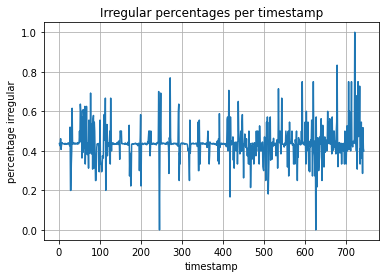

In [107]:
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)

ax.set(xlabel='timestamp', ylabel='percentage irregular',
       title='Irregular percentages per timestamp')

ax.grid()
plt.show()